# Explanation of this notebook

explain...

### <font color='blue'>Setup 1</font>: Load Libraries

In [66]:
import numpy as np
import pandas as pd
import sys, os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 6.0)
plt.style.use('ggplot')

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn-whitegrid'])
sns.set_palette("cubehelix",50)

# 1. Descriptive start

## 1.1 Descriptive analysis for the leads data

In [22]:
def load_table(tablename):
    """ Defining the current directory and path to where data are located. Joining path to
    data folder and table name in order to read the table into a Pandas DataFrame"""
    
    file_path = os.path.join ('../data/') 

    df = os.path.join(file_path, tablename) 
    df = pd.read_csv(df, sep=',', encoding="latin1") 
    
    return df

In [23]:
df_leads = load_table('olist_marketing_qualified_leads_dataset.csv')
df_leads.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [24]:
df_leads.describe()

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,5f68d79da98d5ad7e2fa873c8c8c0383,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [25]:
def plot_top_n_land_page(df, n):

    series = pd.DataFrame(df,columns = ['landing_page_id'])
    
    page_count = series['landing_page_id'].value_counts()/len(df)
    dim = list(range(0,495))
    
    page_count = page_count[:n,]
    dim = dim[:n]
    
    sns.barplot(dim, page_count.values , alpha=0.8)#, color="salmon")
    plt.title('Top 10 frequency of landing page id where the lead was aquired')
    plt.ylabel('Frequency (%)', fontsize=12)
    plt.xlabel('Landing page id', fontsize=12)
    plt.show()

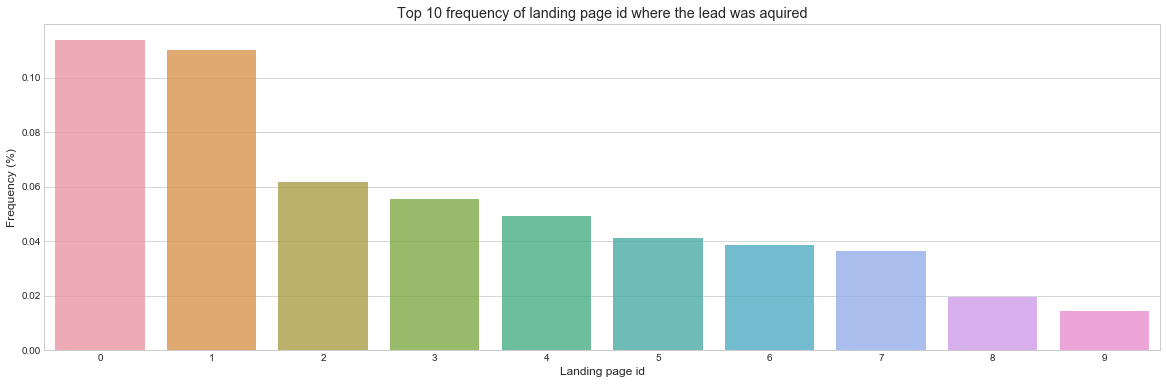

In [26]:
plot_top_n_land_page(df_leads,10)

In [27]:
def plot_origin(df):
    series = pd.DataFrame(df,columns = ['origin'])
    origin_count = series['origin'].value_counts()/len(df)
    
    sns.barplot(origin_count.index, origin_count.values , alpha=0.8)#, color="salmon")
    plt.title('Top 10 frequency of the type of media where the lead was aquired')
    plt.ylabel('Frequency (%)', fontsize=12)
    plt.xlabel('Origin', fontsize=12)
    plt.show()

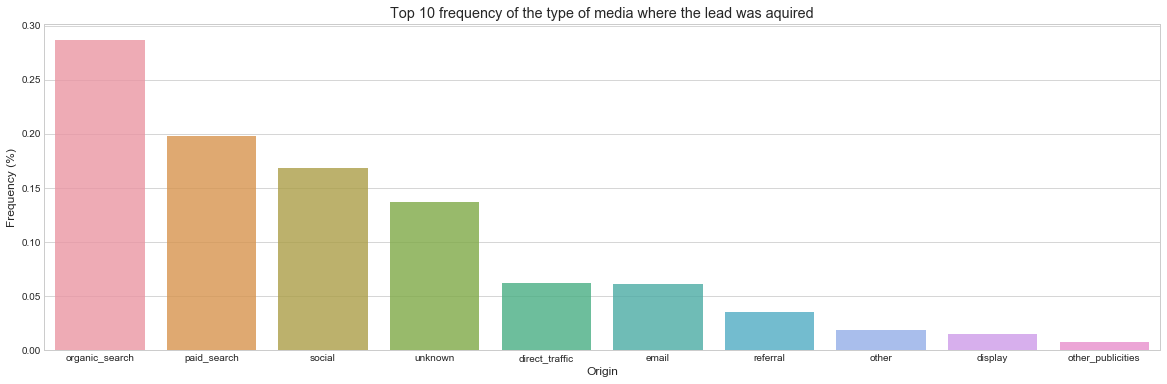

In [28]:
plot_origin(df_leads)

In [29]:
def plot_timeline(df, pct = True, log = False, origin = True):
    series = pd.DataFrame(df,columns = ['first_contact_date','origin'])
    series['freq'] = series.groupby(['first_contact_date','origin'])['first_contact_date'].transform('count')
    series = series.drop_duplicates()
    
    new = series["first_contact_date"].str.split("-", n = 2, expand = True)
    series['first_contact_month'] = new[0]+'-'+new[1]+'-'+'01'
    
    series = series.groupby(['first_contact_month','origin'])['freq'].agg('sum').reset_index()
    
    series['log_value'] = np.log(series['freq'])
    series['log2_value'] = np.log2(series['freq'])
    series['percentage'] = series['freq']/8000
    series['first_contact_month'] = pd.to_datetime(series.first_contact_month)
    
    if origin == True:
        
        if pct == True:
            sns.lineplot(data=series,x='first_contact_month',y='percentage',hue='origin',err_style=None)
            plt.title('Percentage of frequency over time by type of media where the lead was aquired')
            plt.ylabel('Frequency (%)', fontsize=12)
            plt.xlabel('Date', fontsize=12)
            plt.show()
        
        else:
            if log == True:
                sns.lineplot(data=series,x='first_contact_month',y='log_value',hue='origin',err_style=None)
                plt.title('Log value of frequency over time by type of media where the lead was aquired')
                plt.ylabel('Log value of frequency', fontsize=12)
                plt.xlabel('Date', fontsize=12)
                plt.show()
                
            else:
                sns.lineplot(data=series,x='first_contact_month',y='freq',hue='origin',err_style=None)
                plt.title('Frequency over time by type of media where the lead was aquired')
                plt.ylabel('Frequency', fontsize=12)
                plt.xlabel('Date', fontsize=12)
                plt.show()
    
    else:
        sns.lineplot(data=series,x='first_contact_month',y='freq',err_style=None)
        plt.title('Frequency over time where the lead was aquired')
        plt.ylabel('Frequency', fontsize=12)
        plt.xlabel('Date', fontsize=12)
        plt.show()     
        

/Users/MartinJohnsen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


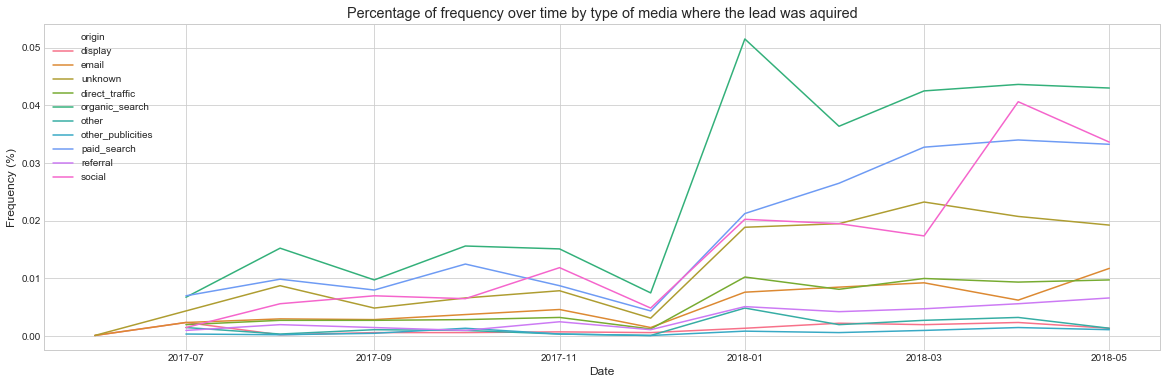

In [30]:
plot_timeline(df_leads, pct = True, log = False, origin = True)

## 1.2 Descriptive analysis for the closed deals

In terms of providing some context, the following discription is taken from the documentation:
> A seller join Olist through a marketing and sales funnel that was made public at this dataset. Description of steps:
Sign-up at a landing page.
Get contacted by a Sales development Representative (SDR), confirm some information and schedule a consultancy.
Consultancy is made by a Sales Representative (SR). The SR may close the deal (lead sing up) or lose the deal (led leaves without sign in)
Lead becomes a seller and starts building his catalog on Olist.
His products are published on marketplaces and ready to sell!

In [31]:
#Reading the leads and closed deals table
leads = pd.read_csv("../data/olist_marketing_qualified_leads_dataset.csv")
closed_leads = pd.read_csv("../data/olist_closed_deals_dataset.csv")

The two tables are then merged, so that we can obtain insights on the closed deals and compare this to the leads. 

In [32]:
closed_leads = closed_leads.merge(leads, on="mql_id", how= "left")

In [33]:
closed_leads.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-14,22c29808c4f815213303f8933030604c,paid_search
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown


The following things are interesting to dive further into:

1. which landing page is most frequent one - compared to the leads? 
2. where does the closed deals primarily come from (origin) - compared to the leads?
3. how long time is the average closing? 
4. are there periods which is better to contact leads?
5. how many closed customers does already have a declared monthly revenue and what does the total closed deals sellers looks like in terms of type, segments etc. 
6. which SDR is best overall 
7. which SDR/SR is best at talking to different leads
8. which SDR/SR is the fastest one

### 1. 

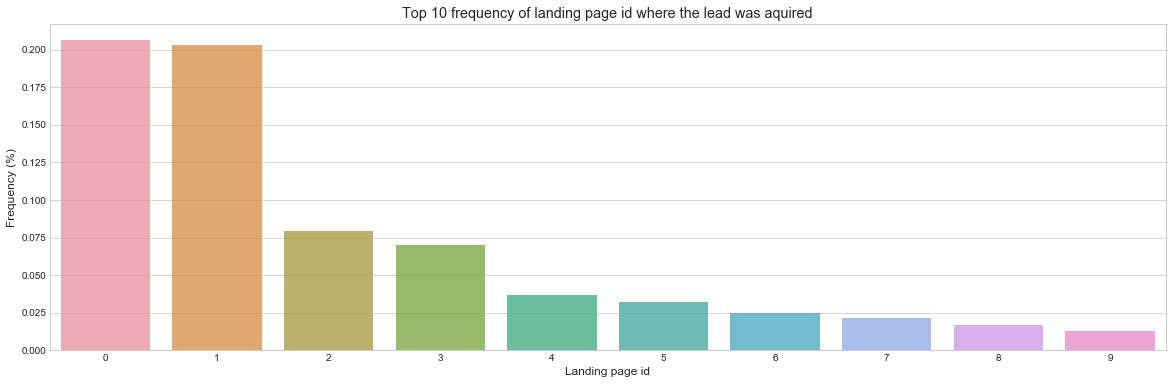

In [34]:
plot_top_n_land_page(closed_leads,10)

### 2.

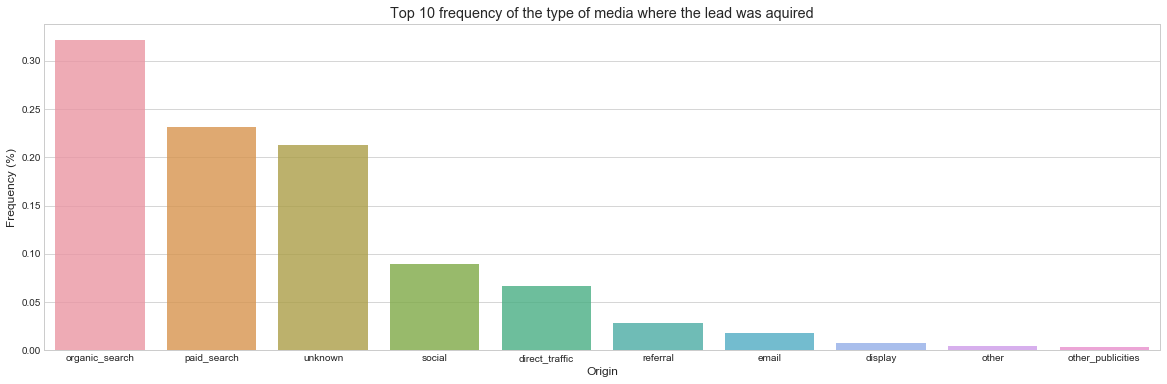

In [35]:
plot_origin(closed_leads)

### 3. How long is the average period for closing a seller

In [36]:
#Checking whether the columns are datetimes
print(type(closed_leads.first_contact_date[0]))
print(type(closed_leads.won_date[0]))

<class 'str'>
<class 'str'>


In [37]:
#Changing these columns to datetimes
closed_leads.first_contact_date = pd.to_datetime(closed_leads.first_contact_date)
closed_leads.won_date = pd.to_datetime(closed_leads.won_date)

In [38]:
#Making an overview of the period from initial contact to closed deal
closed_leads["closing_period"] = closed_leads.won_date-closed_leads.first_contact_date

In [39]:
#Assessing the result from the operation. 
closed_leads.closing_period.head()

0     5 days 19:58:54
1    34 days 20:17:59
2    63 days 17:27:23
3     3 days 13:51:03
4   267 days 20:17:45
Name: closing_period, dtype: timedelta64[ns]

Since we have now obtained the time difference from when the initial contact was made until the closing, we are now able to use this datastrucutre to plot the distribution. 

In [40]:
#Example od a datastructure:
print("This is how the data is formatted: ",closed_leads.closing_period[0])
print("This is the period plotted: ", closed_leads.closing_period.values[0]/np.timedelta64(1, 'D'))

This is how the data is formatted:  5 days 19:58:54
This is the period plotted:  5.832569444444444


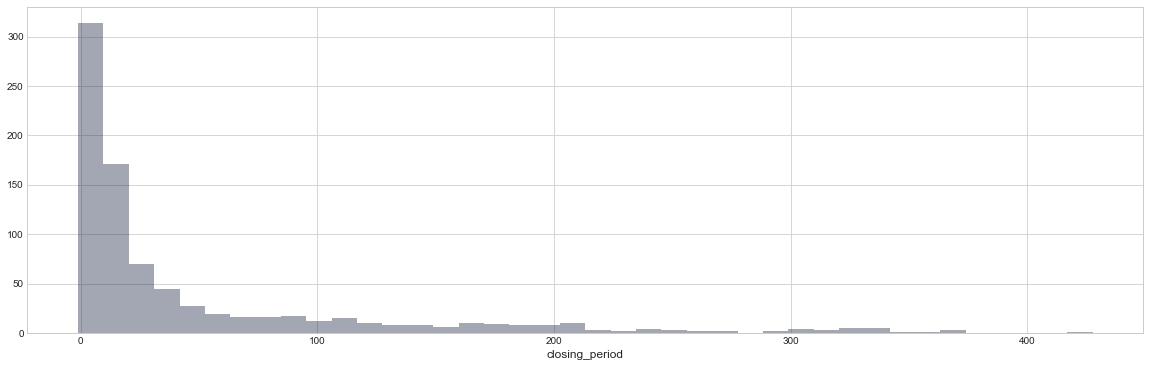

In [41]:
sns.distplot(closed_leads.closing_period/np.timedelta64(1, 'D'),bins=40, kde = False);

### 4. Are there periods where it seems more appropriate to contact the leads than others? 

This question is answered by looking at the leads dataset in comparison with all the closed sellers

In [42]:
#First, the format of the first_contact_date column in the lead dataset is also transformed into datetimes
leads.first_contact_date = pd.to_datetime(leads.first_contact_date)

In [43]:
#In both datasets, we are making a distinct column which holds the month where the seller was contacted
closed_leads["Month_contacted"] = closed_leads.first_contact_date.dt.month
leads["month_contacted"] = leads.first_contact_date.dt.month

In [44]:
#Then we make a variable which hold the data to be plotted:
pct_closed_per_month = closed_leads.groupby(closed_leads["first_contact_date"].dt.month).count().Month_contacted/len(closed_leads)
pct_leads_per_month = leads.groupby(leads["first_contact_date"].dt.month).count().month_contacted/len(leads)

In [45]:
#And put these new variables into a dataframe, so that we can plot these two columns together in the same barchart
months_overview = pd.DataFrame(pct_closed_per_month)
months_overview.columns=["Closed leads contacted"]
months_overview["Leads contacted"] = pct_leads_per_month

In [46]:
months_overview

,Closed leads contacted,Leads contacted
first_contact_date,,
1,0.180523,0.142625
2,0.176960,0.128500
3,0.198337,0.146750
4,0.217340,0.169000
5,0.154394,0.162875
7,0.002375,0.029875
8,0.010689,0.048250
9,0.008314,0.039000
10,0.016627,0.052000


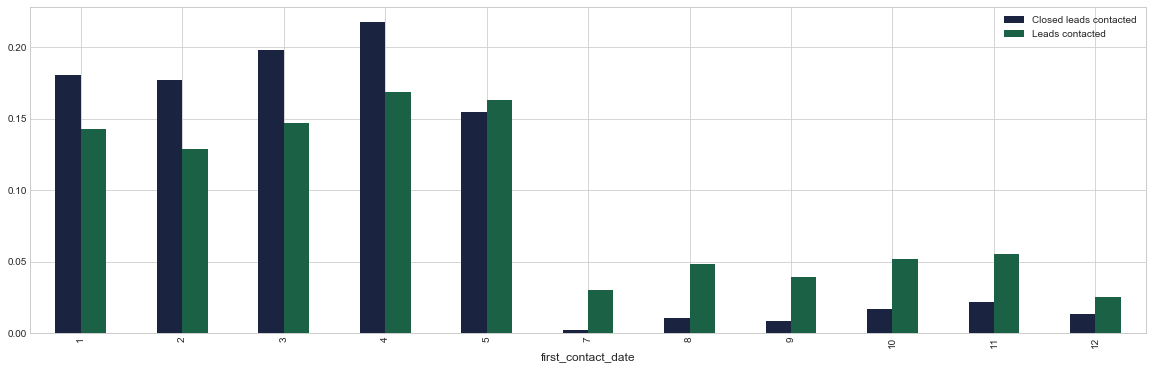

In [47]:
months_overview.plot.bar();

### 5. How many customers does already have a declaired revenue? And what type of business are they?

In [48]:
closed_leads.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,closing_period,Month_contacted
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,5 days 19:58:54,2
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,34 days 20:17:59,4
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,63 days 17:27:23,4
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,3 days 13:51:03,1
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,267 days 20:17:45,10


In [49]:
print("The number of closed companies are: ", len(closed_leads), "\n", \
      "Of all the closed leads the following amount already had a declaired revenue: ", len(closed_leads[closed_leads.declared_monthly_revenue>0]), "\n", \
     "Which amounts to ", len(closed_leads[closed_leads.declared_monthly_revenue>0])/len(closed_leads)*100,"% of the total closed leads")

The number of closed companies are:  842 
 Of all the closed leads the following amount already had a declaired revenue:  45 
 Which amounts to  5.344418052256532 % of the total closed leads


##### The total distribution and exploration of the lead type, business type and business segment

In [50]:
#Defining a pandas with only relevant metrics
business_types = closed_leads[["business_segment", "lead_type", "business_type"]]

In [51]:
#Assessing whether they hold nan values (some of them does)
business_types.isnull().sum()

business_segment     1
lead_type            6
business_type       10
dtype: int64

In [52]:
segment = business_types.business_segment.value_counts()
l_type = business_types.lead_type.value_counts()
b_type = business_types.business_type.value_counts()

In [53]:
type(segment)

pandas.core.series.Series

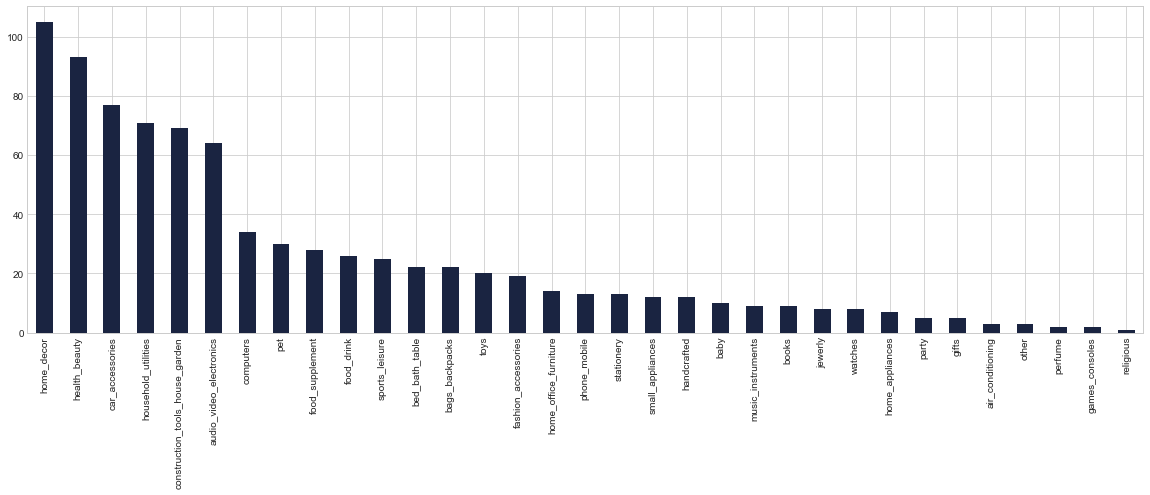

In [54]:
segment.plot.bar();

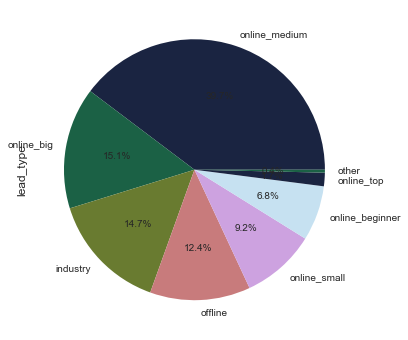

In [55]:
l_type.plot.pie(title=None, autopct='%1.1f%%');

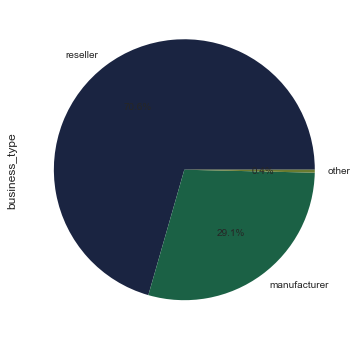

In [56]:
b_type.plot.pie(autopct='%1.1f%%');

### 6. Looking at the SR (and maybe SDR later)

A Sales Development Representative is one having the initial contact witht the company, right after the company has signed up on the landing page. The SDR is noting some general information and arranging a meeting for when the business can meet a Sales Representative who may win or lose the deal.

In general, it is quite difficult to say whether a SR and SDR is good, relative to how many deals they did not close. However, since the SR's and SDR's are not present in the MQL dataset, it is not possible to measure their actual performance agains the number of lost deals. 
Therefore, we assume they have a steady stream of contact with potential sellers, and that some SR's and SDR's are just better at closing the sellers than other SR's and SDR's. 

The following distributions of the rate of closed customers can then be used to address how potentially high value sellers should be contacted and **by who**. 

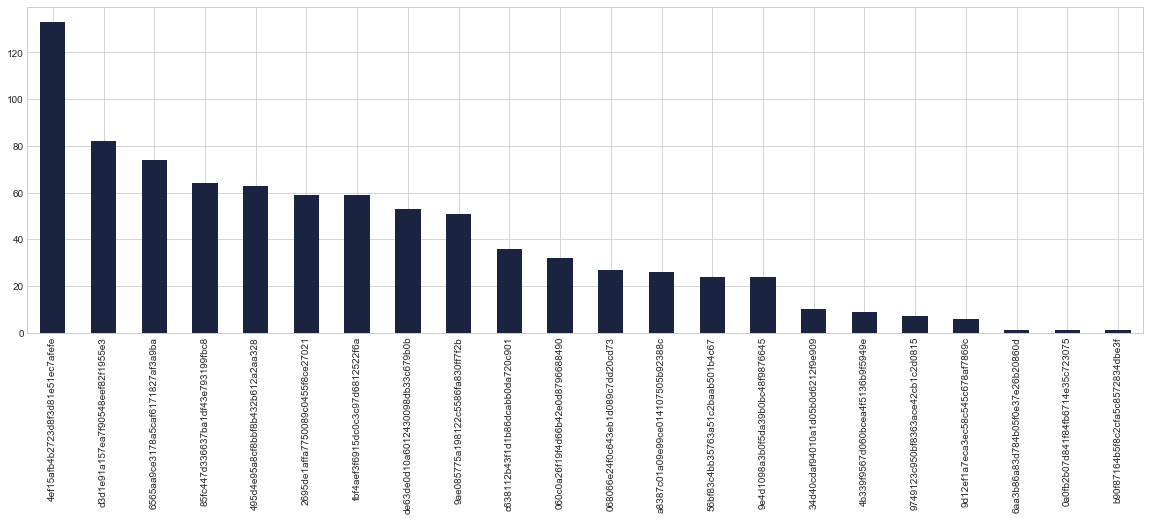

In [57]:
closed_leads.sr_id.value_counts().plot.bar();

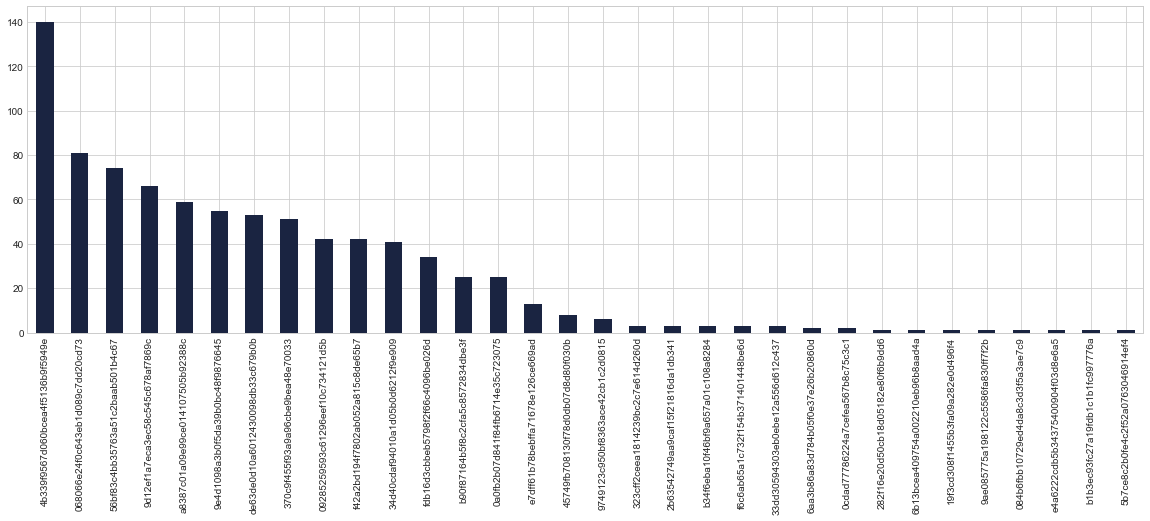

In [58]:
closed_leads.sdr_id.value_counts().plot.bar();

##### Looking at every individual SR and what sellers they are closing in terms of business segments and lead type

In [59]:
#Creating a dataframe holding the different business segments
df_seg = closed_leads.groupby(["sr_id","business_segment"]).count().seller_id.reset_index(name="count")

In [60]:
#Ordering the data properly and removing nan values
df_seg = df_seg.pivot(index= "sr_id", columns= "business_segment", values= "count")
df_seg = df_seg.fillna(0)

In [68]:
#Creating a total column to order the data for later plotting. After ordering, the total column is dropped
df_seg["total"] = df_seg.sum(axis=1)
df_seg = df_seg.sort_values("total",ascending= True)
df_seg = df_seg.drop(["total"],axis=1)

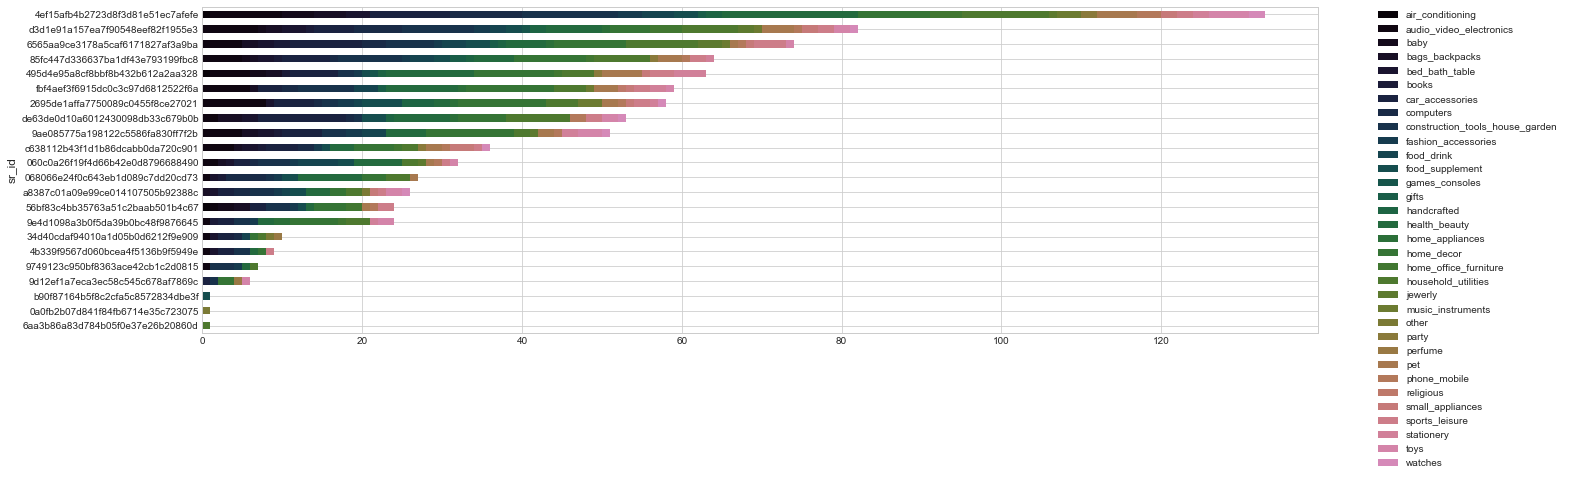

In [71]:
df_seg.plot.barh(stacked= True).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

In [72]:
#Same procedure with lead type:
df_lead = closed_leads.groupby(["sr_id","lead_type"]).count().seller_id.reset_index(name="count")

df_lead = df_lead.pivot(index= "sr_id", columns= "lead_type", values= "count")
df_lead = df_lead.fillna(0)

df_lead["total"] = df_lead.sum(axis=1)
df_lead = df_lead.sort_values("total",ascending= True)
df_lead = df_lead.drop(["total"],axis=1)

In [76]:
plt.style.use(['seaborn-whitegrid'])
sns.set_palette("cubehelix",10)

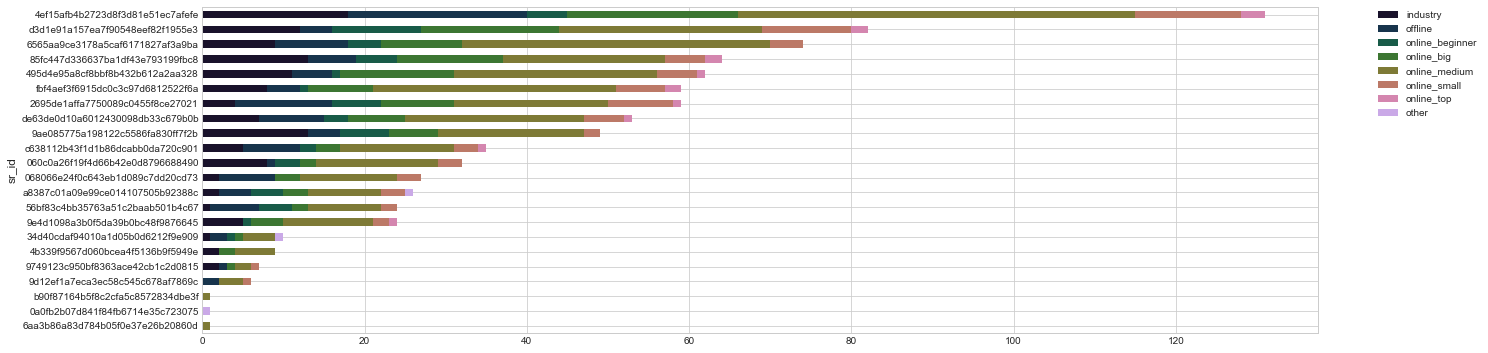

In [77]:
df_lead.plot.barh(stacked= True).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

The plot proves a very important point, namely that the different SR's does not get specific business segments, which could potentially be easier to close. However, they are all recieving a variety of different segments and lead types, which indicate that some SR's are just inherintly better at closing the sellers. 

##### Look at the landing page in combination with origin. This way we can make some kind of probability for closing the customer, from the data we have available - since this is the only features that both datasets have in common. 

# !!!! see above !!!!

# Conclusion on descriptive

# 2. Clustering on sellers

Which things needs to be done before we can proceed with the clustering:
- create features, e.g.:
    - revenue sum
    - geolocation
    - product category 
    - etc. 